In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import nbformat
import plotly.express as px


# seeting up notebook display options and wornings
pd.set_option('display.max_columns', None)
sns.color_palette("rocket", as_cmap=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Getting data from google spreadsheets

sheet_id = "1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY"
sheet_url = url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx"

excel_file = pd.ExcelFile(sheet_url)
sheets = excel_file.sheet_names

In [3]:
# Combine all sheets into a single DataFrame

table_lst = []

for sheet in sheets:
    df = pd.read_excel(excel_file, sheet_name=sheet)

    # spliting sheet name into city and weekday
    city, day = sheet.split("_")

    # additing city and day columns to the dataframe
    df['city'] = city
    df['day'] = day

    table_lst.append(df)

final_df = pd.concat(table_lst, ignore_index=True)

final_df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day
0,0,194.033698,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays
1,1,344.245776,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays
2,2,264.101422,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays
3,3,433.529398,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays
4,4,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays


In [4]:
# adding country column

countries = {
    "amsterdam": "Netherlands",
    "athens": "Greece",
    'berlin': "Germany",
    "barcelona": "Spain",
    "paris": "France",
    "rome": "Italy",
    "lisbon": "Portugal",
    "london":"United Kingdom",
    "vienna": "Austria"
}

final_df['country'] = final_df['city'].map(countries)

final_df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day,country
0,0,194.033698,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays,Netherlands
1,1,344.245776,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays,Netherlands
2,2,264.101422,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays,Netherlands
3,3,433.529398,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays,Netherlands
4,4,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays,Netherlands


In [5]:
# renaming the realSum colum to price

final_df = final_df.rename(columns = {'realSum':"price"})

final_df.head()

,Unnamed: 0,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day,country
0,0,194.033698,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays,Netherlands
1,1,344.245776,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays,Netherlands
2,2,264.101422,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays,Netherlands
3,3,433.529398,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays,Netherlands
4,4,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays,Netherlands


In [6]:
# removing the first unnamed column

final_df.drop(columns = ['Unnamed: 0'], inplace = True)
final_df.head()

,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day,country
0,194.033698,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays,Netherlands
1,344.245776,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays,Netherlands
2,264.101422,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays,Netherlands
3,433.529398,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays,Netherlands
4,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays,Netherlands


In [7]:
# checking the number of rows and columns of the dataset

print(f"Number of rows in the dataset is: {final_df.shape[0]}")
print(f"Number of columns in the dataset is: {final_df.shape[1]}")

Number of rows in the dataset is: 51707
Number of columns in the dataset is: 22


In [8]:
final_df.multi.value_counts()

multi
0    36642
1    15065
Name: count, dtype: int64

In [9]:
# checking the data types of the columns

final_df.dtypes

price                         float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity                 int64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating              int64
guest_satisfaction_overall      int64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
city                           object
day                            object
country                        object
dtype: object

In [13]:
# checking the unique and null values in the dataset

final_df.nunique()

price                         10497
room_type                         3
room_shared                       2
room_private                      2
person_capacity                   5
host_is_superhost                 2
multi                             2
biz                               2
cleanliness_rating                9
guest_satisfaction_overall       53
bedrooms                         10
dist                          51707
metro_dist                    51707
attr_index                    51707
attr_index_norm               51688
rest_index                    51707
rest_index_norm               51688
lng                           23600
lat                           21484
city                             10
day                               2
country                           9
dtype: int64

In [11]:
# checking for null values

final_df.isnull().sum()

price                            0
room_type                        0
room_shared                      0
room_private                     0
person_capacity                  0
host_is_superhost                0
multi                            0
biz                              0
cleanliness_rating               0
guest_satisfaction_overall       0
bedrooms                         0
dist                             0
metro_dist                       0
attr_index                       0
attr_index_norm                  0
rest_index                       0
rest_index_norm                  0
lng                              0
lat                              0
city                             0
day                              0
country                       4022
dtype: int64

In [29]:
# displaying frist 7 rows

final_df.head(7)

,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day,country
0,194.033698,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays,Netherlands
1,344.245776,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays,Netherlands
2,264.101422,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays,Netherlands
3,433.529398,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays,Netherlands
4,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays,Netherlands
5,552.808567,Private room,False,True,3,False,0,0,8,100,2,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376,4.87699,52.38966,amsterdam,weekdays,Netherlands
6,215.124317,Private room,False,True,2,False,0,0,10,94,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251,4.91570,52.38296,amsterdam,weekdays,Netherlands


In [30]:
# displaying last 7 rows
final_df.tail(7)

,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day,country
51700,115.933899,Private room,False,True,4,False,1,0,9,94,1,3.041932,0.308192,109.751387,7.859670,208.517887,5.039797,16.33970,48.19325,vienna,weekends,Austria
51701,750.765491,Entire home/apt,False,False,6,False,0,1,10,96,3,0.378804,0.203138,257.494817,18.440080,548.973296,13.268473,16.37825,48.21001,vienna,weekends,Austria
51702,715.938574,Entire home/apt,False,False,6,False,0,1,10,100,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna,weekends,Austria
51703,304.793960,Entire home/apt,False,False,2,False,0,0,8,86,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna,weekends,Austria
51704,637.168969,Entire home/apt,False,False,2,False,0,0,10,93,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,vienna,weekends,Austria
51705,301.054157,Private room,False,True,2,False,0,0,10,87,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,vienna,weekends,Austria
51706,133.230489,Private room,False,True,4,True,1,0,10,93,1,1.263932,0.480903,150.450381,10.774264,225.247293,5.444140,16.39066,48.20811,vienna,weekends,Austria


In [15]:
# Person capacity

final_df['person_capacity'].value_counts()

person_capacity
2    24333
4    14000
3     6165
6     4274
5     2935
Name: count, dtype: int64

In [19]:
# Cleanliness rating

final_df['cleanliness_rating'].value_counts()

cleanliness_rating
10    30067
9     15458
8      4352
7       947
6       501
4       143
2       143
5        86
3        10
Name: count, dtype: int64

In [22]:
# Guest satisfaction rating

final_df['guest_satisfaction_overall'].unique()

array([ 93,  85,  87,  90,  98, 100,  94,  96,  88,  97,  95,  89,  91,
        84,  77,  99,  80,  92,  82,  78,  86,  74,  81,  83,  73,  76,
        75,  70,  65,  47,  60,  20,  40,  72,  79,  68,  57,  56,  67,
        50,  53,  71,  69,  63,  66,  64,  62,  30,  44,  46,  55,  61,
        54])

In [21]:
# unique number of bedrooms 

final_df['bedrooms'].unique()

array([ 1,  2,  3,  0,  5,  4,  9,  6, 10,  8])

In [23]:
# distance to city center

final_df['dist'].unique()

array([5.0229638 , 0.48838929, 5.74831192, ..., 0.99405133, 3.04409973,
       1.26393173], shape=(51707,))

In [24]:
# distance to nearest metro

final_df['metro_dist'].unique()

array([2.53938   , 0.23940392, 3.65162129, ..., 0.20253882, 0.28743468,
       0.48090251], shape=(51707,))

In [25]:
# attr_index

final_df['attr_index'].unique()

array([ 78.69037927, 631.17637825,  75.27587691, ..., 169.07340182,
       109.23657393, 150.45038145], shape=(51707,))

In [26]:
# attr_index_norm

final_df['attr_index_norm'].unique()

array([ 4.16670787, 33.42120862,  3.9859077 , ..., 12.10792146,
        7.82280266, 10.77426362], shape=(51688,))

In [27]:
# rest_index

final_df['rest_index'].unique()

array([ 98.25389587, 837.28075674,  95.38695493, ..., 282.29642446,
       158.56339833, 225.24729289], shape=(51707,))

In [28]:
# rest_index_norm

final_df['rest_index_norm'].unique()

array([ 6.84647282, 58.34292774,  6.64670025, ...,  6.82299566,
        3.83241616,  5.44414016], shape=(51688,))

In [29]:
# longitude

final_df['lng'].unique()

array([ 4.90569,  4.90005,  4.97512, ..., 16.38047, 16.37953, 16.3794 ],
      shape=(23600,))

In [30]:
# Latitude

final_df['lat'].unique()

array([52.41772, 52.37432, 52.36103, ..., 48.21086, 48.21001, 48.21136],
      shape=(21484,))

In [31]:
# unique cities
final_df['city'].unique()

array(['amsterdam', 'athens', 'berlin', 'barcelona', 'budapest', 'lisbon',
       'london', 'paris', 'rome', 'vienna'], dtype=object)

In [32]:
# day types

final_df['day'].unique()

array(['weekdays', 'weekends'], dtype=object)

In [33]:
# countries

final_df['country'].unique()

array(['Netherlands', 'Greece', 'Germany', 'Spain', nan, 'Portugal',
       'United Kingdom', 'France', 'Italy', 'Austria'], dtype=object)

In [31]:
# displaying random 7 rows

final_df.sample(7)

,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day,country
37990,171.031783,Entire home/apt,False,False,2,False,0,0,9,93,0,3.927141,0.256293,172.062128,8.366533,427.941731,19.741950,2.40486,48.84849,paris,weekends,France
39860,201.762794,Entire home/apt,False,False,4,True,0,0,10,98,1,3.540028,0.303022,326.209878,7.228875,983.700283,21.417924,12.47949,41.87392,rome,weekdays,Italy
37298,155.885917,Entire home/apt,False,False,2,False,0,1,9,88,0,2.081840,0.179207,293.082299,14.251148,781.811057,36.066767,2.37023,48.87132,paris,weekends,France
51600,404.599958,Entire home/apt,False,False,2,False,0,1,10,100,1,1.262089,0.332102,218.212459,15.626937,341.309306,8.249314,16.36616,48.19834,vienna,weekends,Austria
29700,334.909099,Entire home/apt,False,False,4,True,0,1,10,94,2,7.650502,0.531818,161.573200,11.231583,336.672250,6.025847,-0.02403,51.53198,london,weekends,United Kingdom
24026,661.351396,Entire home/apt,False,False,4,False,1,0,10,100,1,2.409150,0.086291,547.371184,38.048378,1115.711246,19.977741,-0.09360,51.51291,london,weekdays,United Kingdom
30593,556.221924,Private room,False,True,4,False,1,0,10,90,2,3.665389,0.339042,315.911150,21.960216,743.445856,13.306385,-0.08615,51.52880,london,weekends,United Kingdom


In [34]:
# summary statistics of numerical columns

final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,51707.0,279.879591,327.948386,34.779339,148.752174,211.343089,319.694287,18545.450285
person_capacity,51707.0,3.161661,1.298545,2.000000,2.000000,3.000000,4.000000,6.000000
multi,51707.0,0.291353,0.454390,0.000000,0.000000,0.000000,1.000000,1.000000
biz,51707.0,0.350204,0.477038,0.000000,0.000000,0.000000,1.000000,1.000000
cleanliness_rating,51707.0,9.390624,0.954868,2.000000,9.000000,10.000000,10.000000,10.000000
guest_satisfaction_overall,51707.0,92.628232,8.945531,20.000000,90.000000,95.000000,99.000000,100.000000
bedrooms,51707.0,1.158760,0.627410,0.000000,1.000000,1.000000,1.000000,10.000000
dist,51707.0,3.191285,2.393803,0.015045,1.453142,2.613538,4.263077,25.284557
metro_dist,51707.0,0.681540,0.858023,0.002301,0.248480,0.413269,0.737840,14.273577
attr_index,51707.0,294.204105,224.754123,15.152201,136.797385,234.331748,385.756381,4513.563486


In [35]:
# summary statistis of categorical columns

final_df.describe(include = 'object')

,room_type,city,day,country
count,51707,51707,51707,47685
unique,3,10,2,9
top,Entire home/apt,london,weekends,United Kingdom
freq,32648,9993,26207,9993


In [35]:
# room type frequency

final_df['room_type'].value_counts()

room_type
Entire home/apt    32648
Private room       18693
Shared room          366
Name: count, dtype: int64

In [36]:
# city frequncy
final_df['city'].value_counts()

city
london       9993
rome         9027
paris        6688
lisbon       5763
athens       5280
budapest     4022
vienna       3537
barcelona    2833
berlin       2484
amsterdam    2080
Name: count, dtype: int64

In [37]:
# day type frequency

final_df['day'].value_counts()

day
weekends    26207
weekdays    25500
Name: count, dtype: int64

In [38]:
# country frequency

final_df['country'].value_counts()

country
United Kingdom    9993
Italy             9027
France            6688
Portugal          5763
Greece            5280
Austria           3537
Spain             2833
Germany           2484
Netherlands       2080
Name: count, dtype: int64

## Exploratory Data Analysis

In [41]:
# finding listings in each city in total also per type of day

final_df.groupby(['city', 'day']).size()

city       day     
amsterdam  weekdays    1103
           weekends     977
athens     weekdays    2653
           weekends    2627
barcelona  weekdays    1555
           weekends    1278
berlin     weekdays    1284
           weekends    1200
budapest   weekdays    2074
           weekends    1948
lisbon     weekdays    2857
           weekends    2906
london     weekdays    4614
           weekends    5379
paris      weekdays    3130
           weekends    3558
rome       weekdays    4492
           weekends    4535
vienna     weekdays    1738
           weekends    1799
dtype: int64

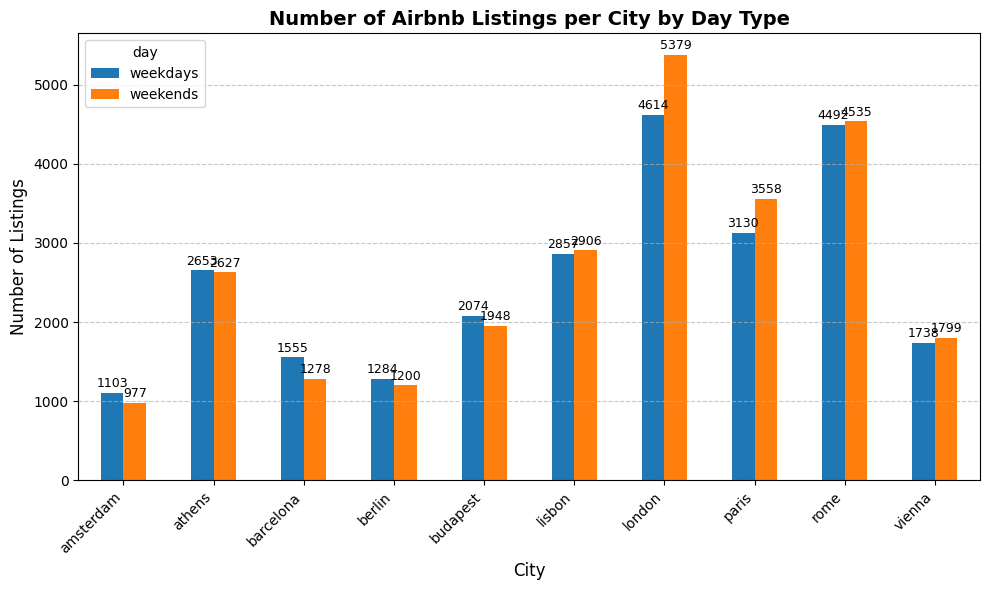

In [55]:

# creating table for plotting booking per day by city
booking_by_day_type = final_df.groupby(['city', 'day']).size().reset_index(name='n_listings')


# reseting the index for pivoting
booking_by_day_type = booking_by_day_type.pivot(index='city', columns='day', values='n_listings')

# Plotting the bar chart
ax = booking_by_day_type.plot(kind='bar', figsize=(10, 6))

plt.title("Number of Airbnb Listings per City by Day Type", fontsize=14, weight='bold')
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

plt.tight_layout()
plt.show()

In [56]:
# Which city has the biggest proportion of superhosts?

# final_df[final_df['host_is_superhost'] == True].groupby('city').size().sort_values(ascending=False)

final_df.groupby('city')['host_is_superhost'].mean().sort_values(ascending=False)  

city
athens       0.428598
budapest     0.378916
rome         0.326687
vienna       0.284139
amsterdam    0.284135
berlin       0.257246
lisbon       0.213951
barcelona    0.181433
london       0.157410
paris        0.140700
Name: host_is_superhost, dtype: float64

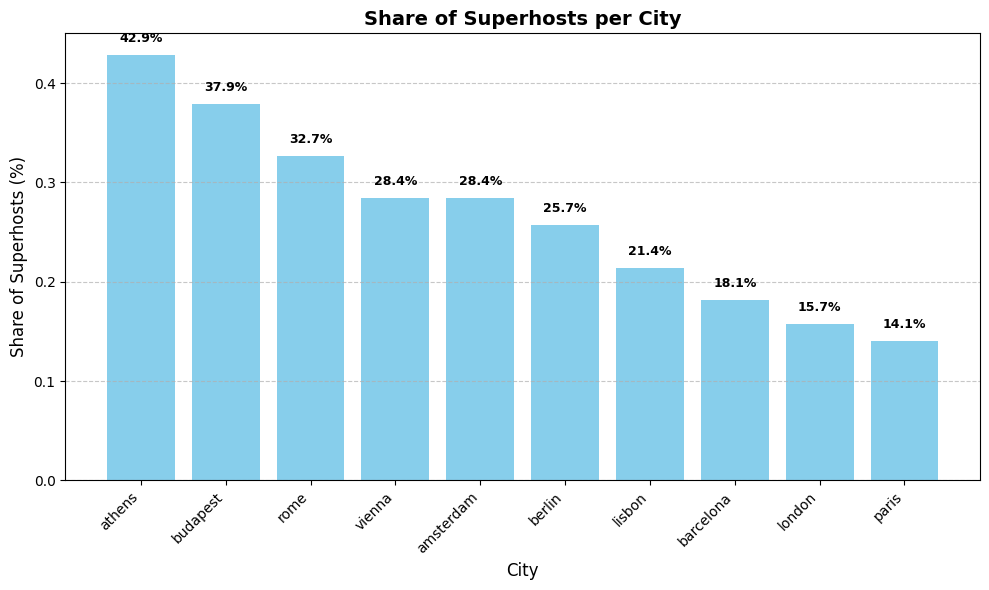

In [53]:

# Calculating the superhosts share per city
superhost_share = final_df.groupby('city')['host_is_superhost'].mean().sort_values(ascending=False)  

# creating the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(superhost_share.index, superhost_share.values, color='skyblue')

# additing title and labels
plt.title("Share of Superhosts per City", fontsize=14, weight='bold')
plt.xlabel("City", fontsize=12)
plt.ylabel("Share of Superhosts (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding annotations (percent values)
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.01,
        f"{height*100:.1f}%",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

In [57]:
# Which cities have listings with more than four rooms?

final_df[final_df['bedrooms']>4]['city'].unique()

array(['amsterdam', 'berlin', 'barcelona', 'lisbon', 'london', 'paris',
       'rome'], dtype=object)

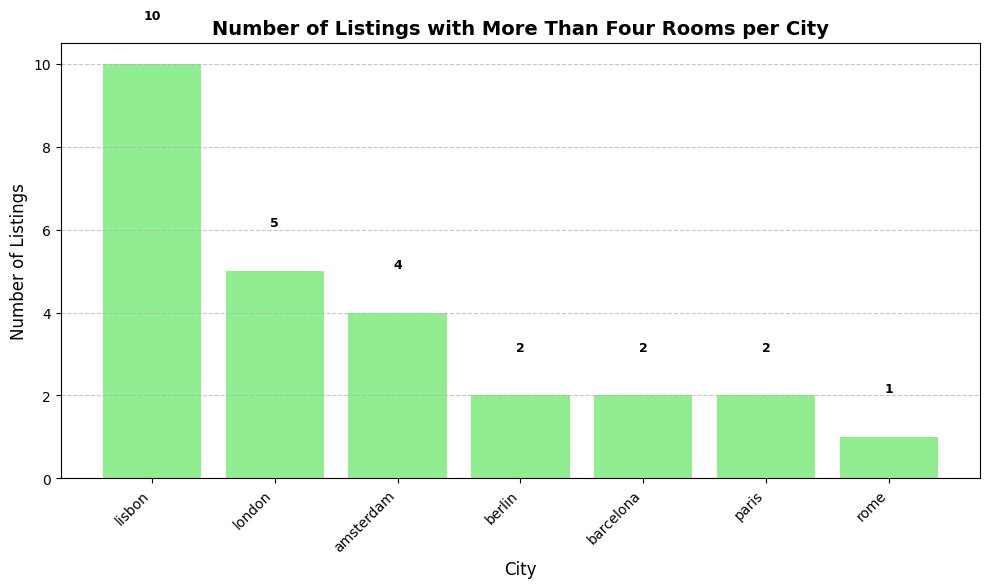

In [ ]:
# Number of listings with more than four rooms per city
listing_with_4_room = final_df[final_df['bedrooms']>4]['city'].value_counts()

# plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(listing_with_4_room.index, listing_with_4_room.values, color='lightgreen')

# adding title and labels
plt.title("Number of Listings with More Than Four Rooms per City", fontsize=14, weight='bold')
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding annotations on each bar
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f"{height}",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

In [62]:
# Which city has the most entire home/apt type listings?

final_df[final_df['room_type'] == 'Entire home/apt'].groupby('city').size().sort_values(ascending=False)[:1]

city
rome    5561
dtype: int64

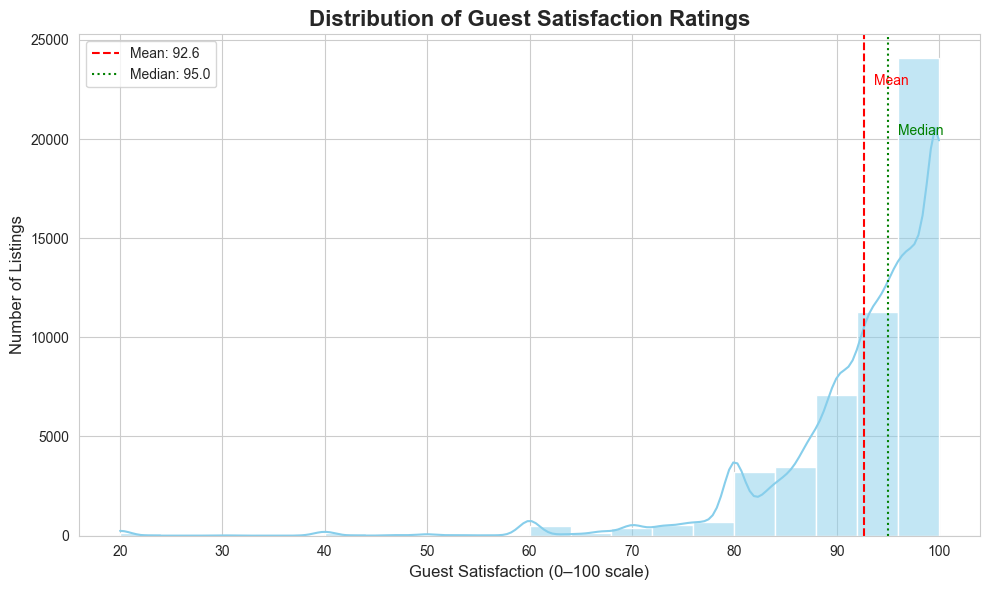

In [ ]:


plt.figure(figsize=(10,6))

# Plot histogram with KDE
ax = sns.histplot(
    final_df['guest_satisfaction_overall'],
    bins=20,
    kde=True,
    color='skyblue',
    edgecolor='white'
)

# Titles and labels
plt.title("Distribution of Guest Satisfaction Ratings", fontsize=16, weight='bold')
plt.xlabel("Guest Satisfaction (0–100 scale)", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)

# Add mean and median lines
mean_val = final_df['guest_satisfaction_overall'].mean()
median_val = final_df['guest_satisfaction_overall'].median()

plt.axvline(mean_val, color='red', linestyle='--', label=f"Mean: {mean_val:.1f}")
plt.axvline(median_val, color='green', linestyle=':', label=f"Median: {median_val:.1f}")
plt.legend()

# Annotate key insights
ax.text(mean_val+1, ax.get_ylim()[1]*0.9, 'Mean', color='red', fontsize=10)
ax.text(median_val+1, ax.get_ylim()[1]*0.8, 'Median', color='green', fontsize=10)

plt.tight_layout()
plt.show()

The guest satisfaction rating for the listins  are highly negative skewed. The graphc indicates that the airbnb users intents to give positive feedback. only a few exception happens where the average rating is below 70-80.

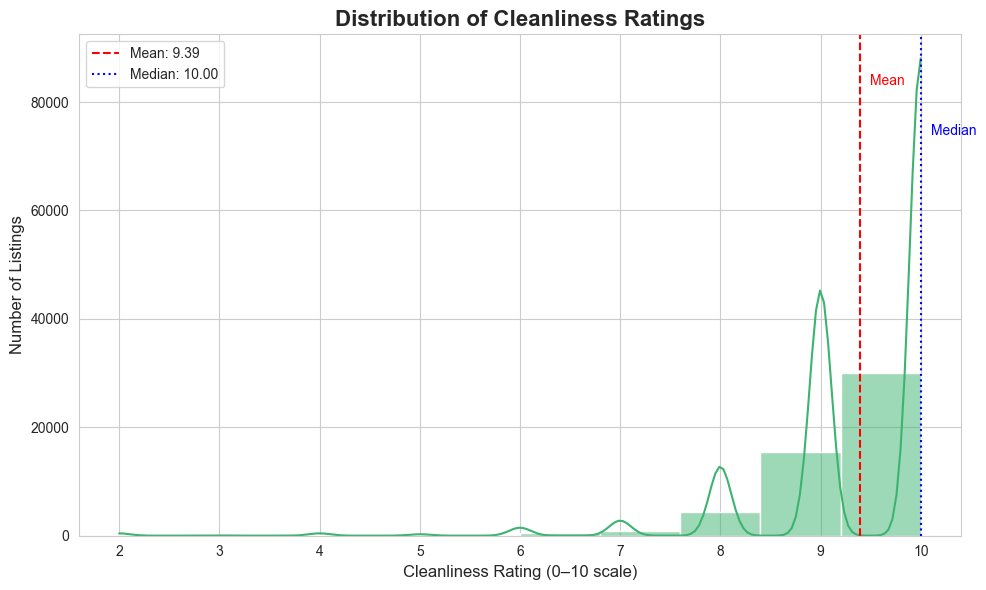

Mean cleanliness rating: 9.39
Median cleanliness rating: 10.00
Standard deviation: 0.95


In [ ]:

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

# Plotting histogram with KDE
ax = sns.histplot(
    final_df['cleanliness_rating'],
    bins=10,
    kde=True,
    color='mediumseagreen',
    edgecolor='white'
)

# adding title and labels
plt.title("Distribution of Cleanliness Ratings", fontsize=16, weight='bold')
plt.xlabel("Cleanliness Rating (0–10 scale)", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)

# calculating mean, median, and standard deviation
mean_val = final_df['cleanliness_rating'].mean()
median_val = final_df['cleanliness_rating'].median()
std_val = final_df['cleanliness_rating'].std()

# adding mean and median lines
plt.axvline(mean_val, color='red', linestyle='--', label=f"Mean: {mean_val:.2f}")
plt.axvline(median_val, color='blue', linestyle=':', label=f"Median: {median_val:.2f}")
plt.legend()

# Annotate inside the chart
ax.text(mean_val+0.1, ax.get_ylim()[1]*0.9, 'Mean', color='red', fontsize=10)
ax.text(median_val+0.1, ax.get_ylim()[1]*0.8, 'Median', color='blue', fontsize=10)

plt.tight_layout()
plt.show()


# print(f"Mean cleanliness rating: {mean_val:.2f}")
# print(f"Median cleanliness rating: {median_val:.2f}")
# print(f"Standard deviation: {std_val:.2f}")

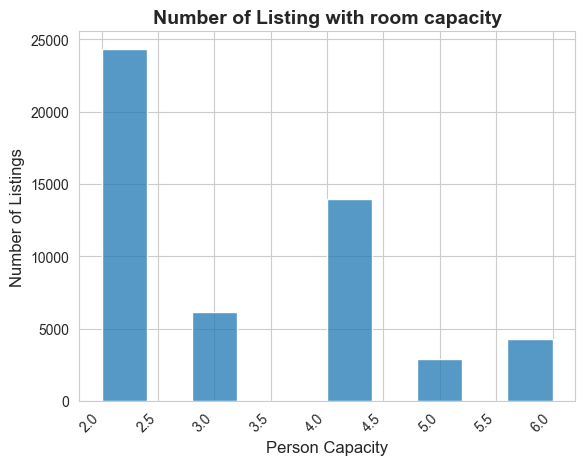

In [63]:
# 6. How does person_capacity vary across listings? What is the most common capacity of listings?

sns.histplot(final_df['person_capacity'], bins=10, kde=False)

# adding title and labels
plt.title("Number of Listing with room capacity", fontsize=14, weight='bold')
plt.xlabel("Person Capacity", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

2 is the most common capacity in the listing

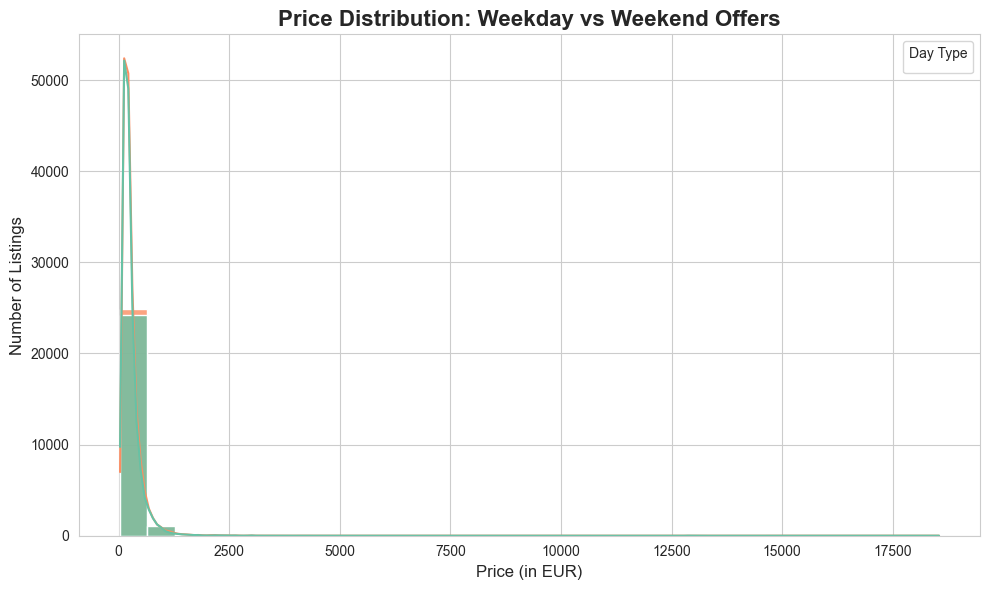

Skewness of original price distribution: 21.42


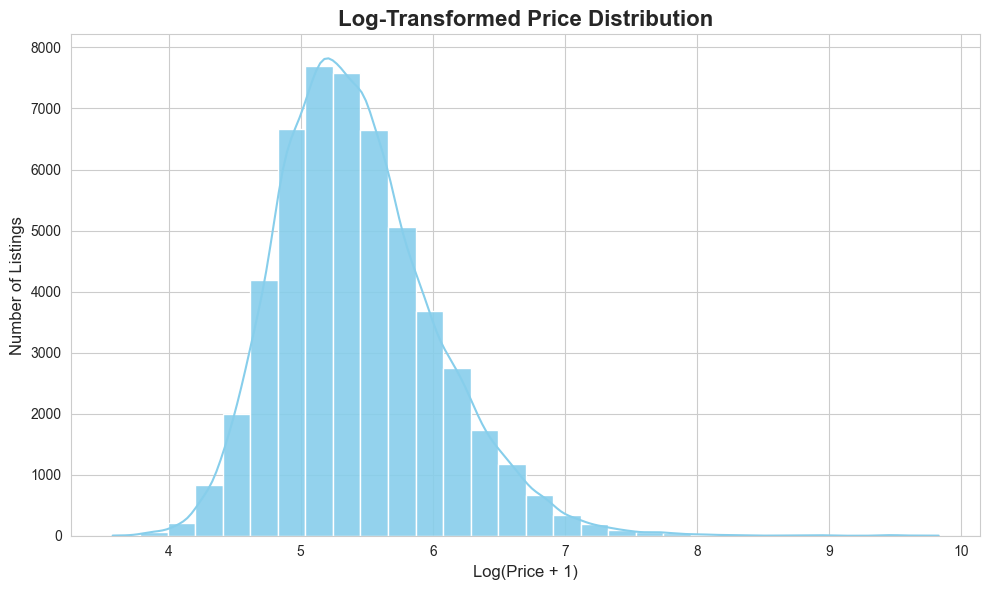

Skewness after log transformation: 0.72


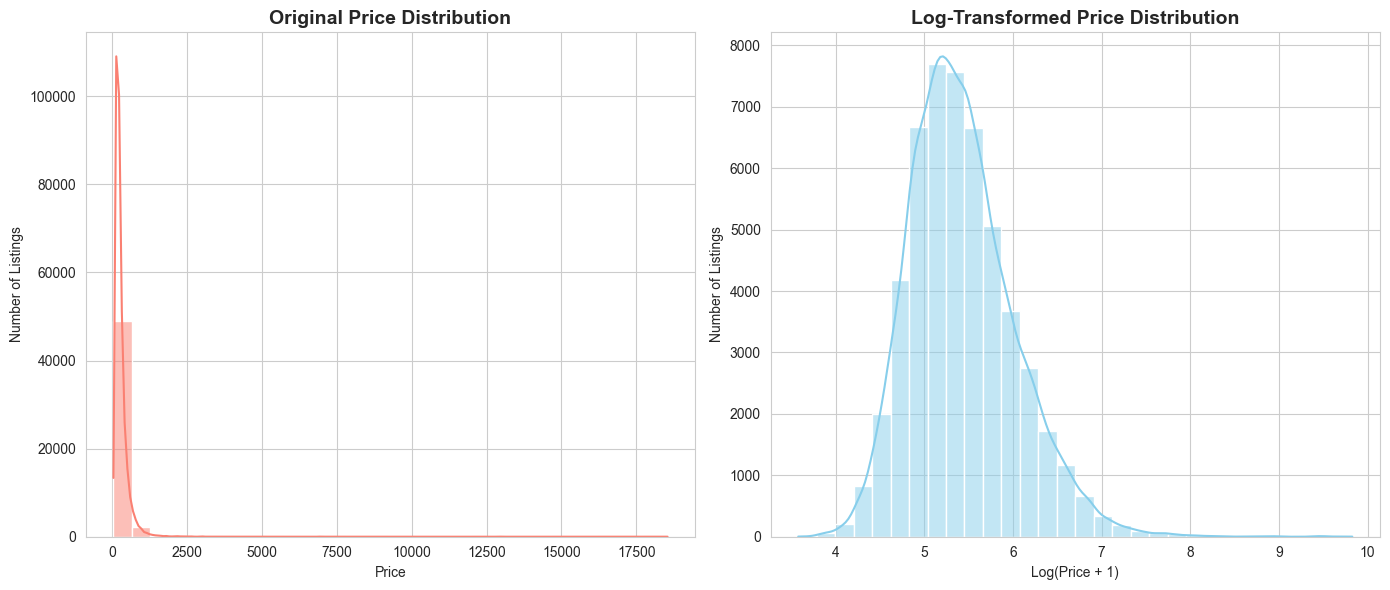

In [66]:
# -------------------------------------------------------------
# 7. Distribution of Price (formerly 'realSum') for Weekday and Weekend Offers
# a. Check normality, skewness, and modality
# b. If skewed, apply log transformation to normalize the distribution
# -------------------------------------------------------------

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Plot original price distribution for weekday vs weekend
sns.histplot(
    data=final_df,
    x='price',
    hue='day',
    bins=30,
    kde=True,
    palette='Set2',
    edgecolor='white',
    alpha=0.8
)

plt.title("Price Distribution: Weekday vs Weekend Offers", fontsize=16, weight='bold')
plt.xlabel("Price (in EUR)", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()

# -------------------------------------------------------------
# Check skewness to determine normality
# -------------------------------------------------------------
skewness = final_df['price'].skew()
print(f"Skewness of original price distribution: {skewness:.2f}")

# -------------------------------------------------------------
# Apply log transformation if data is strongly skewed
# -------------------------------------------------------------
if abs(skewness) > 1:
    # Adding +1 to avoid issues with zero prices
    final_df['log_price'] = np.log(final_df['price'] + 1)

    plt.figure(figsize=(10, 6))
    sns.histplot(
        final_df['log_price'],
        bins=30,
        kde=True,
        color='skyblue',
        edgecolor='white',
        alpha=0.9
    )

    plt.title("Log-Transformed Price Distribution", fontsize=16, weight='bold')
    plt.xlabel("Log(Price + 1)", fontsize=12)
    plt.ylabel("Number of Listings", fontsize=12)
    plt.tight_layout()
    plt.show()

    # Check skewness again after transformation
    log_skewness = final_df['log_price'].skew()
    print(f"Skewness after log transformation: {log_skewness:.2f}")

    # Compare before and after visually
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.histplot(final_df['price'], bins=30, kde=True, color='salmon', ax=axes[0])
    axes[0].set_title("Original Price Distribution", fontsize=14, weight='bold')
    axes[0].set_xlabel("Price")
    axes[0].set_ylabel("Number of Listings")

    sns.histplot(final_df['log_price'], bins=30, kde=True, color='skyblue', ax=axes[1])
    axes[1].set_title("Log-Transformed Price Distribution", fontsize=14, weight='bold')
    axes[1].set_xlabel("Log(Price + 1)")
    axes[1].set_ylabel("Number of Listings")

    plt.tight_layout()
    plt.show()

else:
    print("The price distribution is approximately symmetric; log transformation not required.")


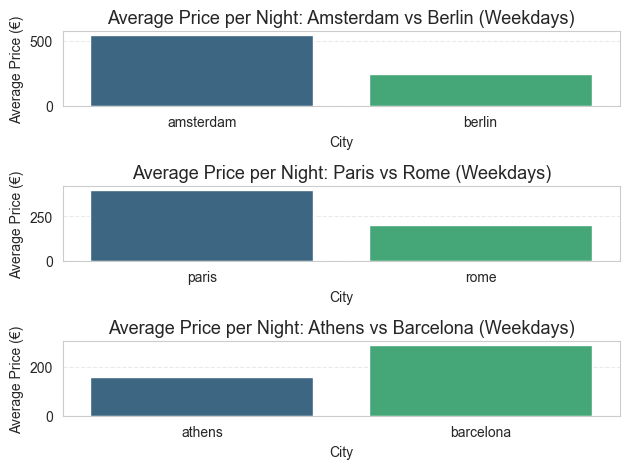

In [68]:
# 8. Is there a difference in price per night between two cities? Choose at least three pairs of cities during weekdays.
weekday_df = final_df[final_df["day"] == "weekdays"]
city_pairs = [
    ("amsterdam", "berlin"),
    ("paris", "rome"),
    ("athens", "barcelona")
]

for i, (c1, c2) in enumerate(city_pairs, 1):
    plt.subplot(3, 1, i)
    
    pair_df = weekday_df[weekday_df["city"].isin([c1, c2])]
    avg_prices = pair_df.groupby("city")["price"].mean().reset_index()
    
    sns.barplot(data=avg_prices, x="city", y="price", palette="viridis")
    
    plt.title(f"Average Price per Night: {c1.title()} vs {c2.title()} (Weekdays)", fontsize=13)
    plt.xlabel("City")
    plt.ylabel("Average Price (€)")
    plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()
    
    

In [86]:


for c1, c2 in city_pairs:
    prices1 = weekday_df[weekday_df["city"] == c1]["price"]
    prices2 = weekday_df[weekday_df["city"] == c2]["price"]

    t_stat, p_val = stats.ttest_ind(prices1, prices2, equal_var=False, nan_policy='omit')

    print(f"{c1.title()} vs {c2.title()}")
    print(f"  Mean prices: {prices1.mean():.2f} vs {prices2.mean():.2f}")
    print(f"  P-value: {p_val:.4f}")
    print("-" * 50)

Amsterdam vs Berlin
  Mean prices: 545.02 vs 240.22
  P-value: 0.0000
--------------------------------------------------
Paris vs Rome
  Mean prices: 398.79 vs 201.62
  P-value: 0.0000
--------------------------------------------------
Athens vs Barcelona
  Mean prices: 155.87 vs 288.39
  P-value: 0.0000
--------------------------------------------------


If we notice the p-values between the cities selected, the p-value is 0 for each which indicates that the prices between the cities is significantly difference.

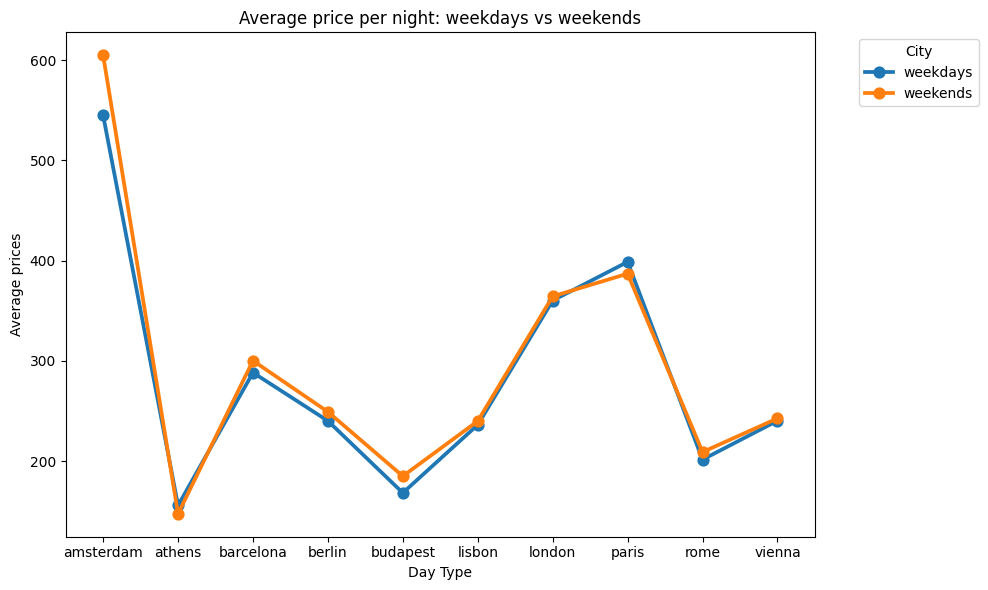

In [97]:
# 9.	Does the price per night tend to be higher on weekends?

price_tendency = final_df.groupby(['day', 'city'])['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.pointplot(data=price_tendency, x='city', y='price', hue='day', marker='o')
plt.title("Average price per night: weekdays vs weekends")
plt.xlabel("Day Type")
plt.ylabel("Average prices")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [101]:
# Finding the differences

diff_prices = price_tendency.pivot(index='city', columns='day', values='price',).assign(diff=lambda x: x['weekends']-x['weekdays'])
print(diff_prices[['weekdays', 'weekends', 'diff']].round(2))

day        weekdays  weekends   diff
city                                
amsterdam    545.02    604.83  59.81
athens       155.87    147.58  -8.29
barcelona    288.39    300.28  11.89
berlin       240.22    249.25   9.03
budapest     168.43    185.12  16.69
lisbon       236.35    240.04   3.70
london       360.23    364.39   4.16
paris        398.79    387.03 -11.76
rome         201.62    209.13   7.51
vienna       240.38    242.74   2.35


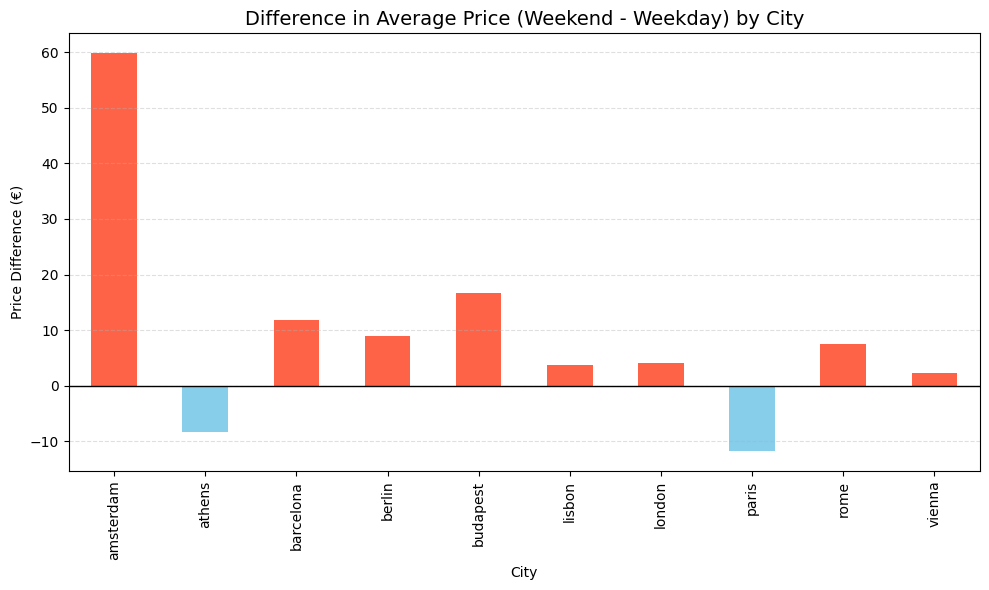

In [103]:
diff_prices["diff"].plot(
    kind="bar",
    figsize=(10,6),
    color=diff_prices["diff"].apply(lambda x: "tomato" if x > 0 else "skyblue")
)

plt.title("Difference in Average Price (Weekend - Weekday) by City", fontsize=14)
plt.xlabel("City")
plt.ylabel("Price Difference (€)")
plt.axhline(0, color="black", linewidth=1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [104]:
# 10.	Are listings of superhosts more expensive than those of normal hosts?

final_df.groupby('host_is_superhost')['price'].mean()

host_is_superhost
False    288.625905
True     254.447726
Name: price, dtype: float64

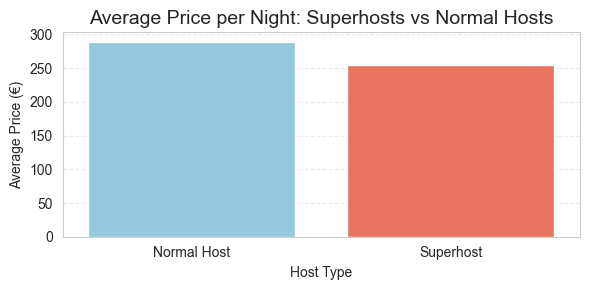

In [69]:
# Visualizing the price difference between superhosts and normal hosts

plt.figure(figsize=(6,3))
sns.barplot(
    data=final_df,
    x="host_is_superhost",
    y="price",
    estimator="mean",
    ci=None,
    palette=["skyblue", "tomato"]
)

plt.title("Average Price per Night: Superhosts vs Normal Hosts", fontsize=14)
plt.xlabel("Host Type")
plt.ylabel("Average Price (€)")
plt.xticks([0, 1], ["Normal Host", "Superhost"])
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [109]:
# Statistical test to check significance
superhost_prices = final_df[final_df['host_is_superhost'] == True]['price']
normalhost_prices = final_df[final_df['host_is_superhost'] == False]['price']

t_stat, p_val = stats.ttest_ind(superhost_prices, normalhost_prices, equal_var=False, nan_policy='omit')
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")

T-statistic: -10.7877, P-value: 0.0000


In [112]:
# 11.	Are superhosts closer to the city center and metro station than normal hosts?

final_df.groupby('host_is_superhost')[['dist', 'metro_dist']].mean()

,dist,metro_dist
host_is_superhost,,
False,3.270057,0.681903
True,2.962239,0.680483


In [113]:
distance_comparison = (
    final_df.groupby("host_is_superhost")[["dist", "metro_dist"]]
    .mean()
    .reset_index()
    .rename(columns={"host_is_superhost": "is_superhost"})
)
print(distance_comparison.round(2))

   is_superhost  dist  metro_dist
0         False  3.27        0.68
1          True  2.96        0.68


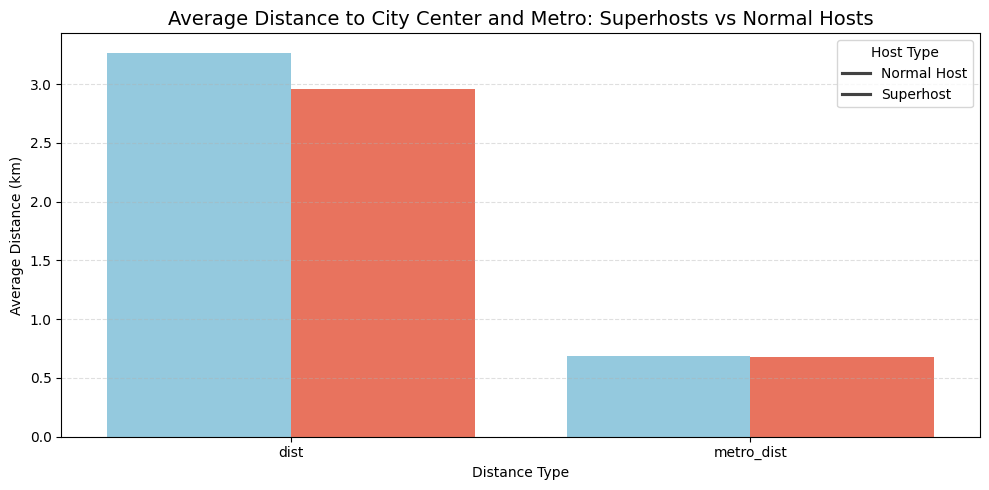

In [115]:
plt.figure(figsize=(10,5))

# Melt data for grouped bar plot
melted = distance_comparison.melt(id_vars="is_superhost", 
                                  value_vars=["dist", "metro_dist"],
                                  var_name="distance_type", 
                                  value_name="average_distance")

sns.barplot(data=melted, x="distance_type", y="average_distance", hue="is_superhost",
            palette=["skyblue", "tomato"])

plt.title("Average Distance to City Center and Metro: Superhosts vs Normal Hosts", fontsize=14)
plt.xlabel("Distance Type")
plt.ylabel("Average Distance (km)")
plt.legend(title="Host Type", labels=["Normal Host", "Superhost"])
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [116]:
# Statistical tests for distance to city center
superhost_dist = final_df[final_df['host_is_superhost'] == True]['dist']
normalhost_dist = final_df[final_df['host_is_superhost'] == False]['dist']
t_stat_dist, p_val_dist = stats.ttest_ind(superhost_dist, normalhost_dist, equal_var=False, nan_policy='omit')
print(f"Distance to City Center - T-statistic: {t_stat_dist:.4f}, P-value: {p_val_dist:.4f}")

Distance to City Center - T-statistic: -12.9980, P-value: 0.0000


In [118]:
# 12.	Are superhosts cleaner than normal hosts?

final_df.groupby('host_is_superhost')['cleanliness_rating'].mean()
cleanliness_comparison = (
    final_df.groupby("host_is_superhost")["cleanliness_rating"]
    .mean()
    .reset_index()
    .rename(columns={"host_is_superhost": "is_superhost", "cleanliness_rating": "avg_cleanliness"})
)
print(cleanliness_comparison.round(2))

   is_superhost  avg_cleanliness
0         False             9.24
1          True             9.83


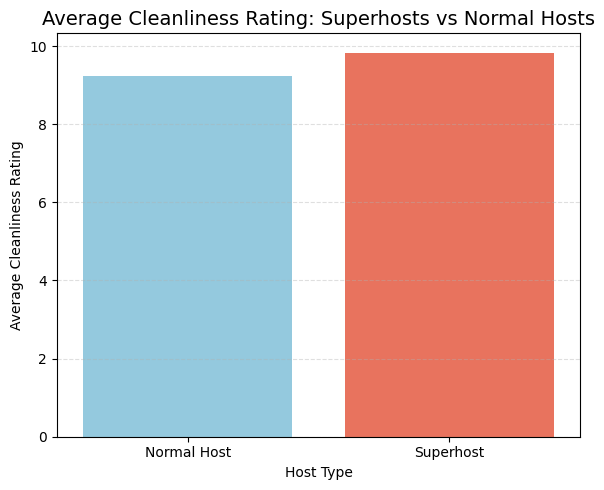

In [119]:
plt.figure(figsize=(6,5))
sns.barplot(
    data=final_df,
    x="host_is_superhost",
    y="cleanliness_rating",
    estimator="mean",
    ci=None,
    palette=["skyblue", "tomato"]
)

plt.title("Average Cleanliness Rating: Superhosts vs Normal Hosts", fontsize=14)
plt.xlabel("Host Type")
plt.ylabel("Average Cleanliness Rating")
plt.xticks([0, 1], ["Normal Host", "Superhost"])
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [124]:
# 13.	Is there a pattern between room types and superhost status?


room_superhost_table = pd.crosstab(final_df["room_type"], final_df["host_is_superhost"])
room_superhost_table.columns = ["Normal Host", "Superhost"]
print(room_superhost_table)

                 Normal Host  Superhost
room_type                              
Entire home/apt        23704       8944
Private room           14446       4247
Shared room              325         41


In [125]:
# percentage of superhosts per room type

room_superhost_percent = (
    room_superhost_table.div(room_superhost_table.sum(axis=1), axis=0) * 100
).round(1)
print(room_superhost_percent)

                 Normal Host  Superhost
room_type                              
Entire home/apt         72.6       27.4
Private room            77.3       22.7
Shared room             88.8       11.2


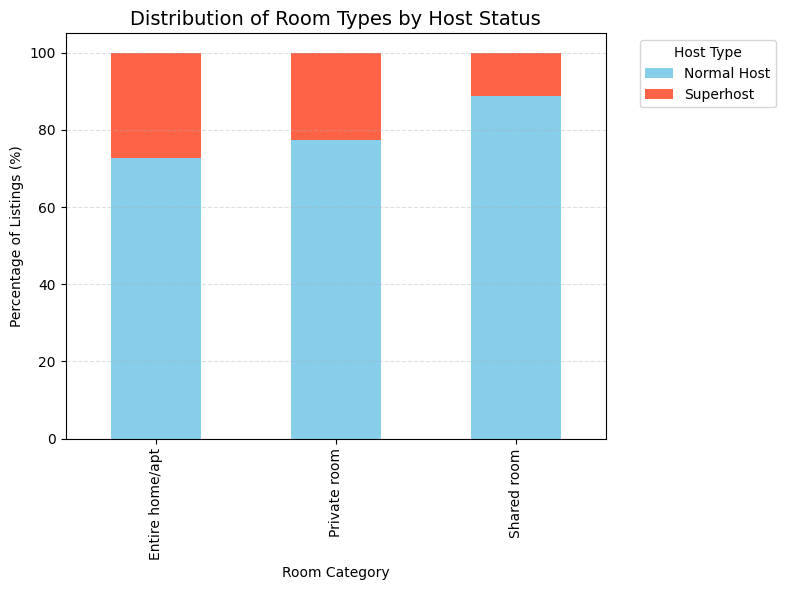

In [126]:
room_superhost_percent.plot(
    kind="bar",
    stacked=True,
    color=["skyblue", "tomato"],
    figsize=(8,6)
)

plt.title("Distribution of Room Types by Host Status", fontsize=14)
plt.xlabel("Room Category")
plt.ylabel("Percentage of Listings (%)")
plt.legend(title="Host Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [128]:
# 14.	Is renting an entire home/apt more expensive than a private room? Does that depend on the city?

room_price_comparison = (
    final_df.groupby("room_type")["price"]
    .mean()
    .reset_index()
    .sort_values("price", ascending=False)
)
print(room_price_comparison.round(2))

         room_type   price
0  Entire home/apt  324.32
1     Private room  204.94
2      Shared room  143.57


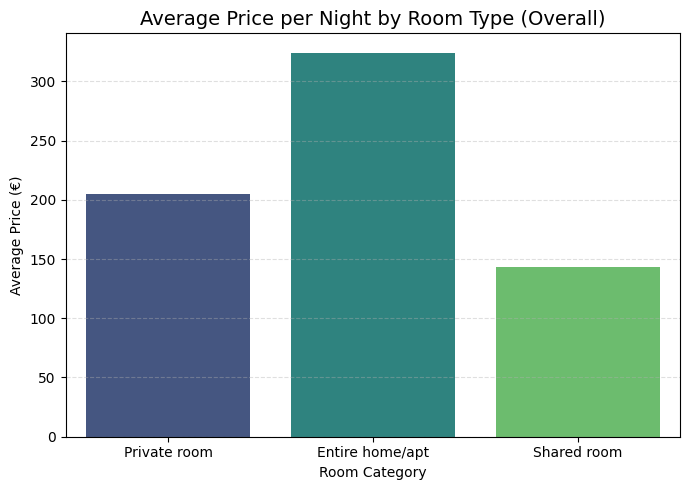

In [130]:
plt.figure(figsize=(7,5))
sns.barplot(data=final_df, x="room_type", y="price", estimator="mean", ci=None, palette="viridis")

plt.title("Average Price per Night by Room Type (Overall)", fontsize=14)
plt.xlabel("Room Category")
plt.ylabel("Average Price (€)")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

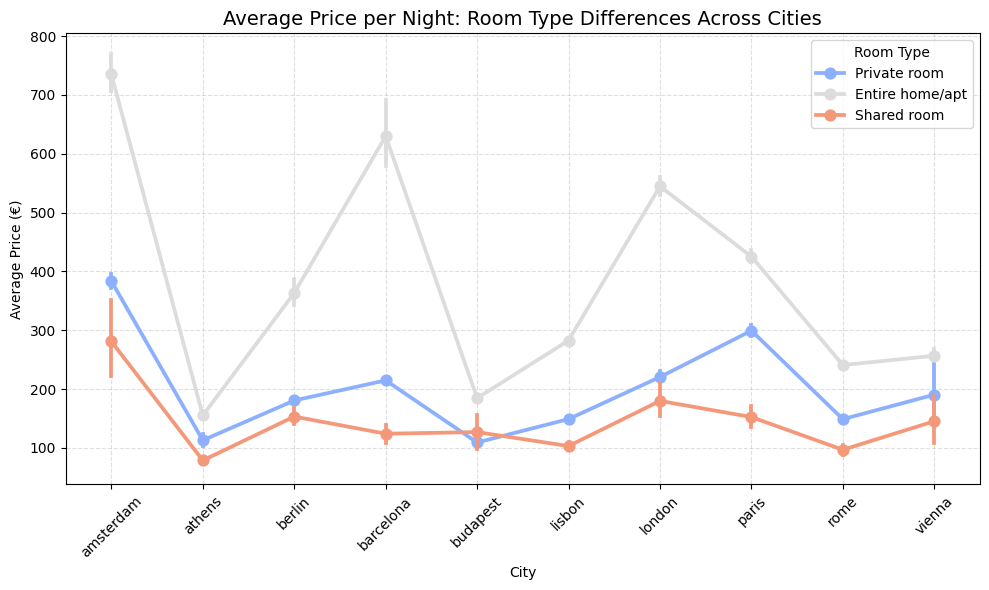

In [132]:
plt.figure(figsize=(10,6))
sns.pointplot(data=final_df, x="city", y="price", hue="room_type", estimator="mean", palette="coolwarm", markers="o", linestyles="-")

plt.title("Average Price per Night: Room Type Differences Across Cities", fontsize=14)
plt.xlabel("City")
plt.ylabel("Average Price (€)")
plt.legend(title="Room Type")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()